### $\text{Problem 6. Advection equation finite difference solution}$

In [154]:
from __future__ import division
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import numpy.linalg as npla
import scipy.linalg as spla

In [155]:
def u(x):
    if abs(x) <= 1/2:
        return np.cos(np.pi*x)*np.cos(np.pi*x)
    else:
        return 0

$\text{(a) FTBS with }\lambda = 0.8$

In [156]:
def FTBS(a,lamda,h,X,T):
    '''
    Forward Time Backward Space Scheme
    '''        
    k = lamda*h
    
    x_domain = np.arange(X[0],X[1],step=h)
    t_domain = np.arange(T[0],T[1],step=k)
    
    x_size = len(x_domain)
    t_size = len(t_domain)
    U = np.zeros((t_size,x_size))
    
    # use boundary condition to compute for all t at x = -3
    for i in range(t_size):
        U[i][0] = 0
    
    # use initial condtion to compute for all x at t = 0 
    for i in range(x_size):
        U[0][i] = u(-3+(i*h))
        
    # set flag to check usefulness
    flag = 0
    
    # compute using FTBS scheme
    for i in range(1,t_size):
        for j in range(1,x_size):
            U[i][j] = U[i-1][j]*(1-a*lamda) + a*lamda*U[i-1][j-1]  
            if U[i][j] > 5:
                flag = 1
    
    if flag == 1:
        print("The scheme is useless.")
    else:
        print("The scheme is useful.")
    
    return U

In [157]:
# initialize domains
X = (-3,3)
T = (0,2.4)

# modelling from the equation
a = 1

spatial_steps = [1/10, 1/20, 1/40, 1/80]

The scheme is useful.


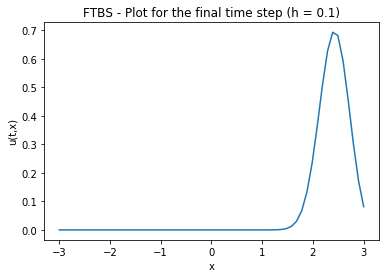

The scheme is useful.


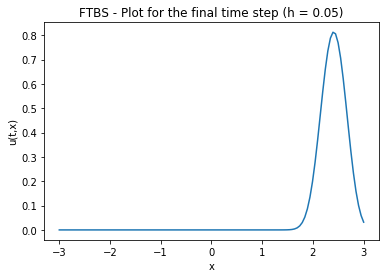

The scheme is useful.


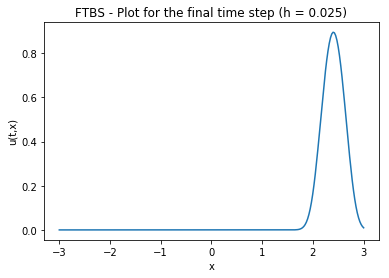

The scheme is useful.


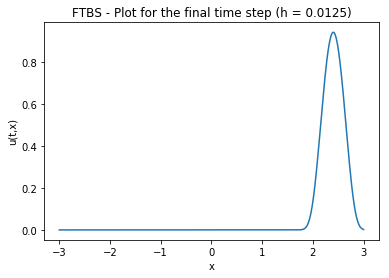

In [158]:
lamda = 0.8

for h in spatial_steps:
    U = FTBS(a,lamda,h,X,T)
    x = np.linspace(-3,3,len(U[-1]))
    plt.title('FTBS - Plot for the final time step (h = '+str(h)+')')
    plt.plot(x,U[-1])
    plt.ylabel('u(t,x)')
    plt.xlabel('x')
    plt.show()

$\text{(a) FTCS with }\lambda = 0.8$

In [159]:
def FTCS(a,lamda,h,X,T):
    '''
    Forward Time Centered Space Scheme
    '''        
    k = lamda*h
    
    x_domain = np.arange(X[0],X[1],step=h)
    t_domain = np.arange(T[0],T[1],step=k)
    
    x_size = len(x_domain)
    t_size = len(t_domain)
    U = np.zeros((t_size,x_size))
    
    # use boundary condition to compute for all t at x = -3
    for i in range(t_size):
        U[i][0] = 0
    
    # use initial condtion to compute for all x at t = 0 
    for i in range(x_size):
        U[0][i] = u(-3+(i*h))
    
    # set flag to check usefulness
    flag = 0
    
    # compute using FTCS scheme
    for i in range(1,t_size):
        for j in range(1,x_size-1):
            U[i][j] = U[i-1][j] - (a*lamda/2)*(U[i-1][j+1] - U[i-1][j-1])        
            if U[i][j] > 5:
                flag = 1
    
    # use boundary condition to compute for all t at x = 3
    for i in range(t_size):
        U[i][-1] = U[i][-2]   
    
    if flag == 1:
        print('The Scheme is useless.')
    else:
        print('The Scheme is useful.')
    
    return U

The Scheme is useless.


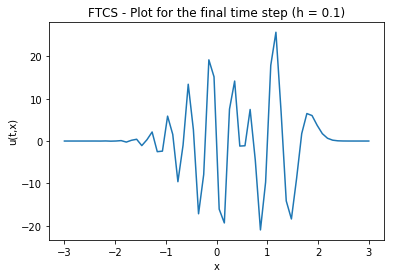

The Scheme is useless.


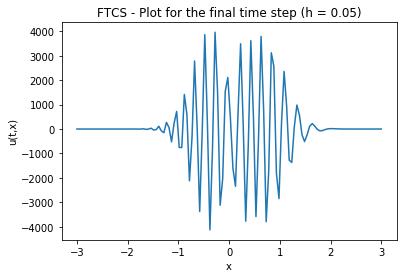

The Scheme is useless.


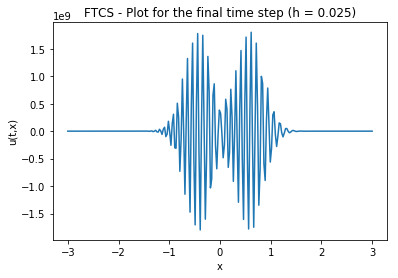

The Scheme is useless.


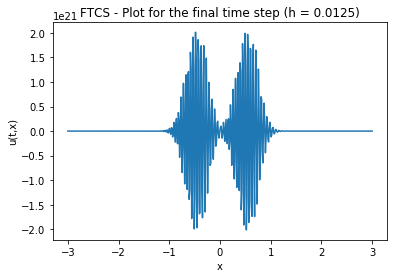

In [160]:
lamda = 0.8

for h in spatial_steps:
    U = FTCS(a,lamda,h,X,T)
    x = np.linspace(-3,3,len(U[-1]))
    plt.title('FTCS - Plot for the final time step (h = '+str(h)+')')
    plt.plot(x,U[-1])
    plt.ylabel('u(t,x)')
    plt.xlabel('x')
    plt.show()

$\text{(a) Lax-Friedrichs with }\lambda = 0.8$

In [161]:
def laxfriedrich(a,lamda,h,X,T):
    '''
    Lax Friedrich's Scheme
    '''        
    k = lamda*h
    
    x_domain = np.arange(X[0],X[1],step=h)
    t_domain = np.arange(T[0],T[1],step=k)
    
    x_size = len(x_domain)
    t_size = len(t_domain)
    U = np.zeros((t_size,x_size))
    
    # use boundary condition to compute for all t at x = -3
    for i in range(t_size):
        U[i][0] = 0
    
    # use initial condtion to compute for all x at t = 0 
    for i in range(x_size):
        U[0][i] = u(-3+(i*h))
    
    # set flag to check usefulness
    flag = 0
    
    # compute using Lax Friedrich's scheme
    term_1 = (1-a*lamda)/2
    term_2 = (1+a*lamda)/2
    for i in range(1,t_size):
        for j in range(1,x_size-1):
            U[i][j] = term_1*U[i-1][j+1] + term_2*U[i-1][j-1] 
            if U[i][j] > 5:
                flag = 1
    
    # use boundary condition to compute for all t at x = 3
    for i in range(t_size):
        U[i][-1] = U[i][-2]   
    
    if flag == 1:
        print('The Scheme is useless.')
    else:
        print('The Scheme is useful.')
    
    return U

The Scheme is useful.


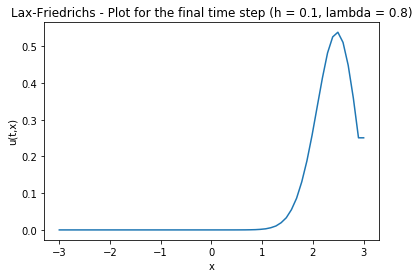

The Scheme is useful.


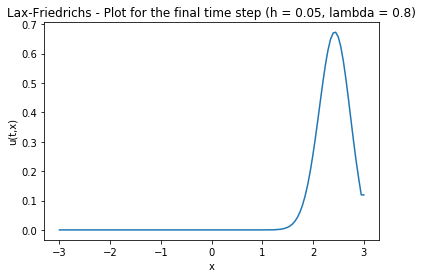

The Scheme is useful.


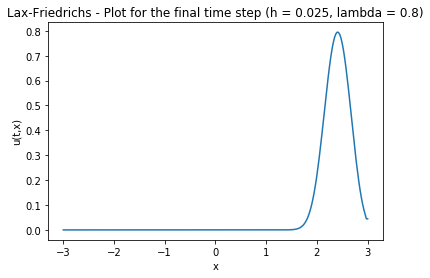

The Scheme is useful.


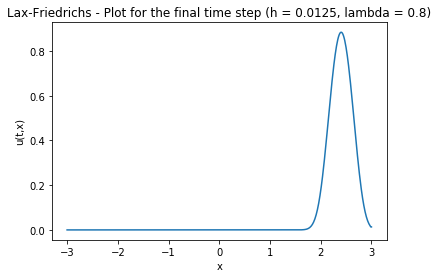

In [162]:
lamda = 0.8
for h in spatial_steps:
    U = laxfriedrich(a,lamda,h,X,T)
    x = np.linspace(-3,3,len(U[-1]))
    plt.title('Lax-Friedrichs - Plot for the final time step (h = '+str(h)+', lambda = '+str(lamda)+')')
    plt.plot(x,U[-1])
    plt.ylabel('u(t,x)')
    plt.xlabel('x')
    plt.show()

$\text{(c) Lax-Friedrichs with }\lambda = 1.6$

The Scheme is useless.


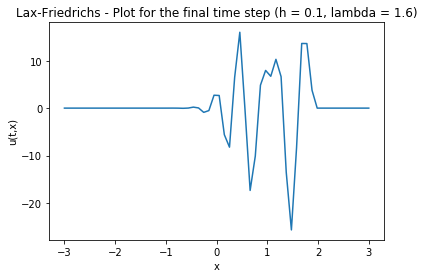

The Scheme is useless.


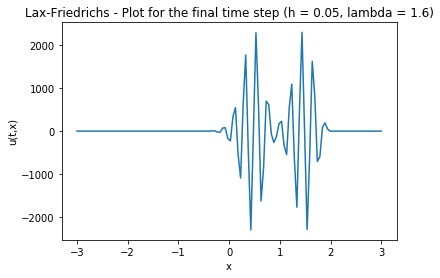

The Scheme is useless.


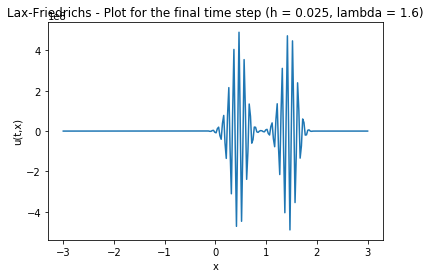

The Scheme is useless.


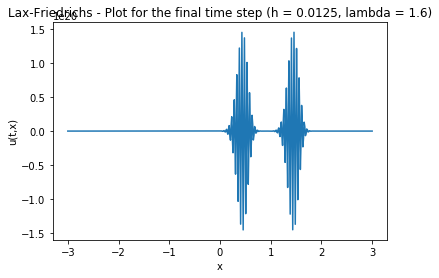

In [163]:
lamda = 1.6
for h in spatial_steps:
    U = laxfriedrich(a,lamda,h,X,T)
    x = np.linspace(-3,3,len(U[-1]))
    plt.title('Lax-Friedrichs - Plot for the final time step (h = '+str(h)+', lambda = '+str(lamda)+')')
    plt.plot(x,U[-1])
    plt.ylabel('u(t,x)')
    plt.xlabel('x')
    plt.show()

$\text{(d) Leapfrog with }\lambda = 0.8$

In [164]:
def leapfrog(a,lamda,h,X,T):
    '''
    Leapfrog Scheme
    '''        
    k = lamda*h
    
    x_domain = np.arange(X[0],X[1],step=h)
    t_domain = np.arange(T[0],T[1],step=k)
    
    x_size = len(x_domain)
    t_size = len(t_domain)
    U = np.zeros((t_size,x_size))
    
    # use boundary condition to compute for all t at x = -3
    for i in range(t_size):
        U[i][0] = 0
    
    # use initial condtion to compute for all x at t = 0 
    for i in range(x_size):
        U[0][i] = u(-3+(i*h))
        
    # compute using FTCS at n = 1
    for i in range(1,x_size-1):
        U[1][i] = U[0][i] - (a*lamda/2)*(U[0][i+1] - U[0][i-1])
    
    # set flag to check usefulness
    flag = 0
    
    # compute using leapfrog scheme
    for i in range(2,t_size):
        for j in range(1,x_size-1):
            U[i][j] = U[i-2][j] - a*lamda*(U[i-2][j+1]-U[i-2][j-1])  
            if U[i][j] > 5:
                flag = 1
    
    # use boundary condition to compute for all t at x = 3
    for i in range(t_size):
        U[i][-1] = U[i][-2]   
    
    if flag == 1:
        print('The Scheme is useless.')
    else:
        print('The Scheme is useful.')
    
    return U

The Scheme is useless.


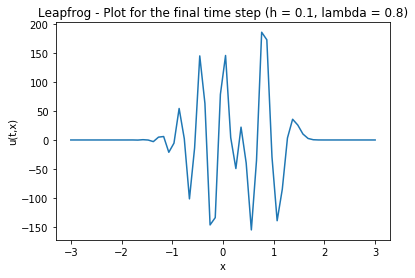

The Scheme is useless.


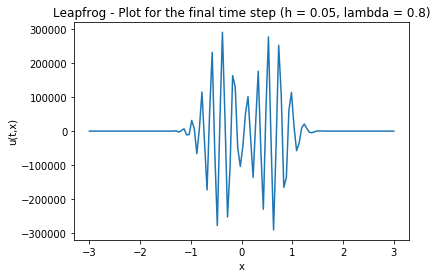

The Scheme is useless.


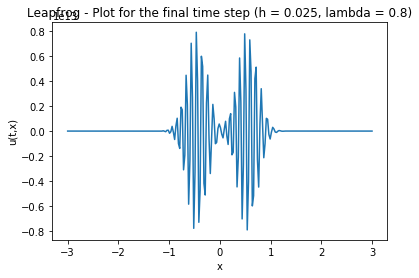

The Scheme is useless.


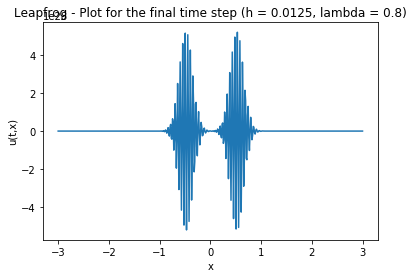

In [165]:
lamda = 0.8
for h in spatial_steps:
    U = leapfrog(a,lamda,h,X,T)
    x = np.linspace(-3,3,len(U[-1]))
    plt.title('Leapfrog - Plot for the final time step (h = '+str(h)+', lambda = '+str(lamda)+')')
    plt.plot(x,U[-1])
    plt.ylabel('u(t,x)')
    plt.xlabel('x')
    plt.show()